# NLP Assignment 1

In this assignment you will prepare your own dataset of movies and pre-process the text.


### Dataset Access APIs

The dataset will be prepared using TMDB API. The API has two interfaces. First interface gives the page wise list of movies and the second API gives the list of genres as under:-


### • Movies List

This api gives page wise list of movies. There are total 471 pages exposed by the this interface. You can fetch the JSON file of each page by calling following URL while mentioning page number at the end as query parameter as shown below

https://api.themoviedb.org/3/movie/top_rated?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US&page=PAGE_NO


For example to get first page, the PI call will be

https://api.themoviedb.org/3/movie/top_rated?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US&page=1


while to get page 20 , the API call will be

https://api.themoviedb.org/3/movie/top_rated?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US&page=20


In [ ]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Dataset

In [ ]:
import requests
import json
import time

api_key = "2666c14f12b8bfa12d0a5c7c1ae8389b"
base_url = "https://api.themoviedb.org/3/movie/top_rated"

# Define the path where you want to save the dataset in your Google Drive
save_path = '/content/drive/MyDrive/Colab Notebooks/Natural Language Processing/movies_dataset.json'

def fetch_movies(page):
    params = {
        'api_key': api_key,
        'language': 'en-US',
        'page': page
    }
    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data for page {page}. Status code: {response.status_code}")
        return None

def create_movie_dataset(num_pages):
    dataset = []

    for page in range(1, num_pages + 1):
        movie_data = fetch_movies(page)

        if movie_data:
            dataset.extend(movie_data['results'])
            time.sleep(1)  # To avoid hitting API rate limits

    return dataset

num_pages = 471  # Total number of pages available
movie_dataset = create_movie_dataset(num_pages)

# Save the dataset to Google Drive as a JSON file
with open(save_path, 'w') as file:
    json.dump(movie_dataset, file)


## Text Preprocessing

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load the JSON dataset into a DataFrame
df = pd.read_json(save_path)

# Combine title and overview into a single text column
df['text_data'] = df['title'] + ' ' + df['overview']

# Lowercase the text
df['text_data'] = df['text_data'].str.lower()

# Tokenize the text
df['tokens'] = df['text_data'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['stemmed_tokens'] = df['filtered_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])


Analysis of processed text data

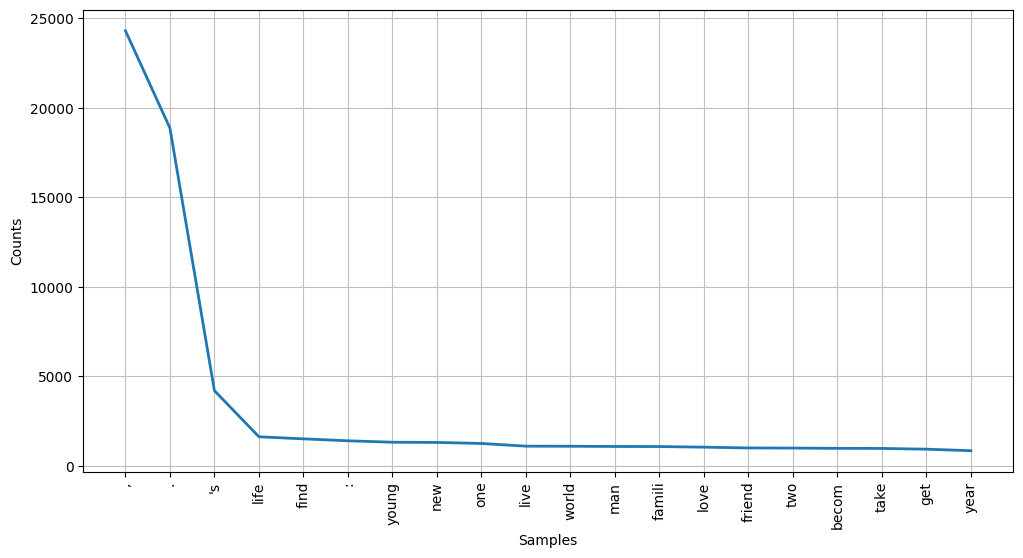

In [ ]:
# Calculate word frequencies
all_tokens = [word for tokens in df['stemmed_tokens'] for word in tokens]
freq_dist = FreqDist(all_tokens)

# Plot the most common words
plt.figure(figsize=(12, 6))
freq_dist.plot(20, cumulative=False)
plt.show()
